<a href="https://colab.research.google.com/github/pascal-maker/brain-tumor/blob/master/Brain_Tumor_Classification_J031_J046_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import os,gc,pathlib
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
import torchvision.models as models

In [4]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 60% 9.00M/15.1M [00:00<00:00, 77.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 113MB/s] 


In [5]:

!unzip "/content/brain-mri-images-for-brain-tumor-detection.zip"

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

# Reading the dataset

In [6]:
DATA_DIR='/content/brain_tumor_dataset'

In [7]:
os.listdir(f'{DATA_DIR}')

['no', 'yes']

In [10]:
from fastai.vision.all import *

# Set the path to your data directory
DATA_DIR = '/content/brain_tumor_dataset'  # Update this with your actual data path

# Create ImageDataLoaders from the folder
data = ImageDataLoaders.from_folder(
    DATA_DIR,
    train='.',  # Using the main folder for training
    valid_pct=0.3,
    bs=24,
    num_workers=0,
    item_tfms=Resize(224),  # Resize images to 224x224
    batch_tfms=aug_transforms(size=224)  # Apply augmentations and normalization
)

print(f'Classes: \n {data.vocab}')


Classes: 
 ['no', 'yes']


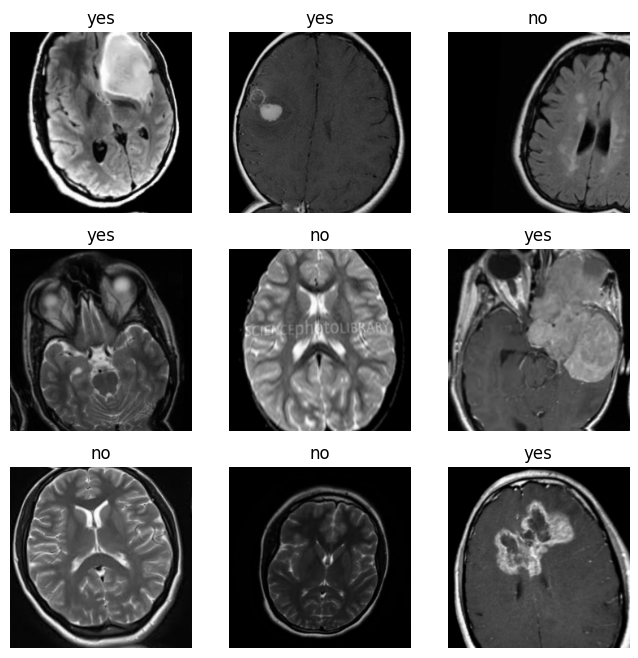

In [12]:
data.show_batch( figsize=(8,8))

In [13]:
from fastai.vision.all import *

# Assuming data has been defined with ImageDataLoaders.from_folder
learner = cnn_learner(
    data,
    vgg16,                         # Use vgg16 architecture
    metrics=[accuracy],            # Metrics to evaluate during training
    cbs=[ShowGraphCallback()],     # Callback to show training graphs
    model_dir="/tmp/model/"        # Directory to save the model
)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██

AttributeError: 'Sequential' object has no attribute 'plot_lr_find'

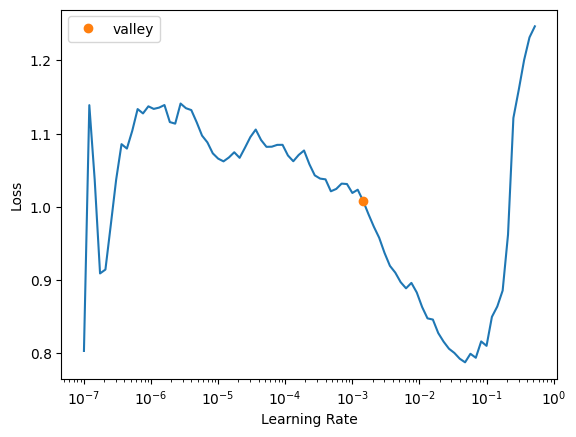

In [15]:
learner.lr_find()
learner.plot_lr_find()  # This replaces learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.977319,0.494179,0.800000,00:02
1,0.845603,0.494977,0.760000,00:02
2,0.714206,0.555304,0.773333,00:02
3,0.640145,0.650551,0.786667,00:02
4,0.549131,0.323637,0.866667,00:03
5,0.487641,0.522206,0.853333,00:02
6,0.431275,0.584094,0.866667,00:02
7,0.404425,0.568776,0.826667,00:02
8,0.367555,0.627171,0.826667,00:02
9,0.344835,0.607199,0.840000,00:02


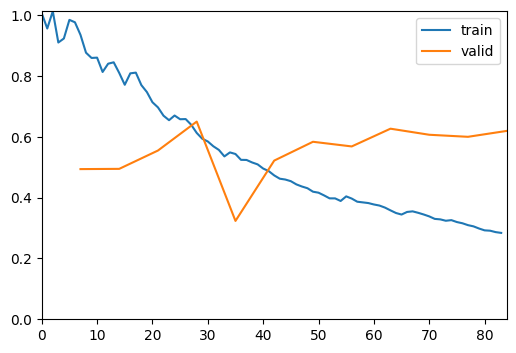

In [17]:
learner.fit_one_cycle(12, slice(1e-02))

In [21]:
learner.save('/content/save')

Path('/content/save.pth')

In [20]:
! mkdir save

In [22]:
learner.unfreeze()

AttributeError: 'Sequential' object has no attribute 'plot_lr_find'

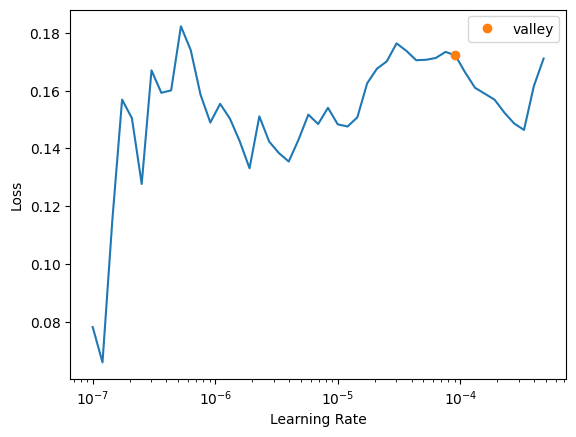

In [24]:
learner.lr_find()
learner.plot_lr_find()

In [25]:
learner.load('/content/save')

epoch,train_loss,valid_loss,accuracy,time
0,0.195536,0.604129,0.880000,00:04
1,0.206141,0.605411,0.880000,00:04
2,0.200966,0.561140,0.906667,00:04
3,0.170153,0.577390,0.866667,00:04


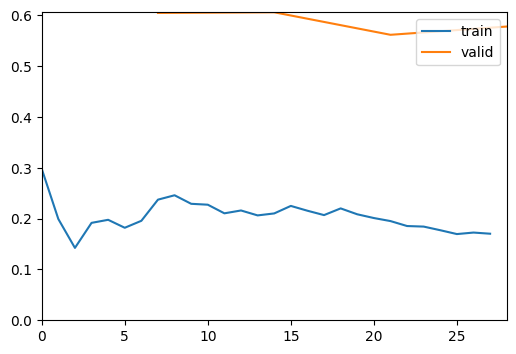

In [27]:
learner.fit_one_cycle(4,slice(1e-04))

In [28]:
learner.save('/content/save')

Path('/content/save.pth')

In [29]:
learner.recorder.plot_losses()

AttributeError: 'Sequential' object has no attribute 'plot_losses'

In [30]:
interp = ClassificationInterpretation.from_learner(learner)

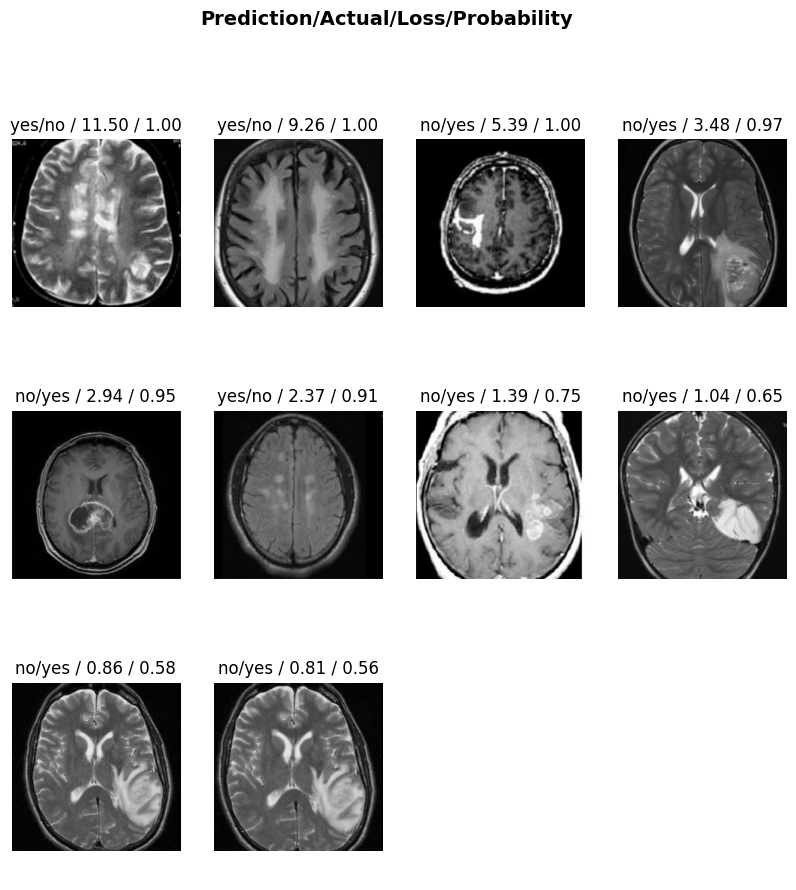

In [31]:
interp.plot_top_losses(10, figsize=(10,10))

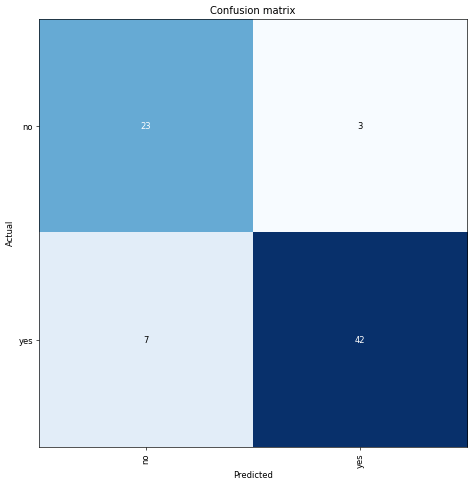

In [32]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)